In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']
X
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [40]:
model = Sequential()
# this is a classification problem and output has 3 classes
model.add(Input(shape=(4,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='softmax'))



In [41]:
LEARNING_RATE = 0.01

In [42]:
from tensorflow.keras.optimizers import Adam
adam_opt  = Adam(learning_rate = LEARNING_RATE,beta_1 = 0.9,beta_2 = 0.999,epsilon = 1e-8)
model.compile(optimizer=adam_opt,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])



In [76]:
hitory = model.fit(X_train,y_train,
                  epochs = 20,
                   validation_data = (X_test,y_test),
                    batch_size = 32 )

Epoch 1/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3438 - loss: 1.1101

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3482 - loss: 1.1036 - val_accuracy: 0.2895 - val_loss: 1.1033
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3482 - loss: 1.1035 - val_accuracy: 0.2895 - val_loss: 1.1034
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3482 - loss: 1.1033 - val_accuracy: 0.2895 - val_loss: 1.1033
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3482 - loss: 1.1033 - val_accuracy: 0.2895 - val_loss: 1.1033
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3482 - loss: 1.1032 - val_accuracy: 0.2895 - val_loss: 1.1032
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3482 - loss: 1.1030 - val_accuracy: 0.2895 - val_loss: 1.1033
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3482 - loss: 1.1030 - val_accuracy: 0.2895 - val_loss: 1.1032
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3482 - loss: 1.1030 - val_accuracy: 0.2895 - val_loss: 1.1031
Epoch 9/20


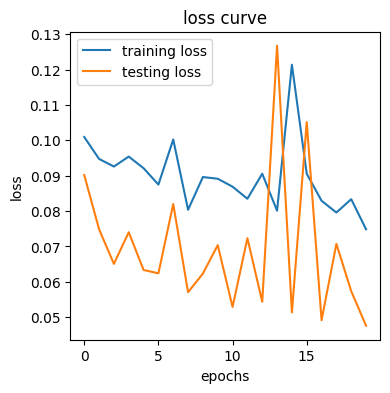

In [51]:
plt.figure(figsize=(4,4))
plt.plot(hitory.history['loss'],label = "training loss")
plt.plot(hitory.history['val_loss'],label = "testing loss")
plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Loss functions in Deep Learning

* mse
* mae
* Binary cross Entropy (log loss)
* categorical cross entropy 
* sparse categotical cross entropy

### comparing other optimizers with adam

In [69]:
from tensorflow.keras.optimizers import Adadelta

adadelta = Adadelta(learning_rate = 0.01,
                    rho = 0.95,
                    epsilon = 1e-8)
model.compile(optimizer=adadelta,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [70]:
history1 = model.fit(X_train,y_train,
                     validation_data = (X_test,y_test),
                     batch_size = 32,
                     epochs = 20)

Epoch 1/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1049
Epoch 9/20

In [72]:
from tensorflow.keras.optimizers import Adafactor
adafac= Adafactor(learning_rate = 0.01,
                  epsilon_1 = 1e-30,
                  epsilon_2 = 0.001,
                  beta_2_decay = -0.8
                  )

In [73]:
model.compile(optimizer=adafac,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [74]:
history2 = model.fit(X_train,y_train,
                     batch_size = 32,
                     validation_data = (X_test,y_test),
                     epochs = 20)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.3482 - loss: 1.1078 - val_accuracy: 0.2895 - val_loss: 1.1047
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3482 - loss: 1.1076 - val_accuracy: 0.2895 - val_loss: 1.1046
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3482 - loss: 1.1073 - val_accuracy: 0.2895 - val_loss: 1.1047
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3482 - loss: 1.1070 - val_accuracy: 0.2895 - val_loss: 1.1046
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3482 - loss: 1.1068 - val_accuracy: 0.2895 - val_loss: 1.1045
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3482 - loss: 1.1067 - val_accuracy: 0.2895 - val_loss: 1.1043
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3482 - loss: 1.1064 - val_accuracy: 0.2895 - val_loss: 1.1040
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3482 - loss: 1.1061 - val_accuracy: 0.2895 - val_loss: 1.1040

### comparison


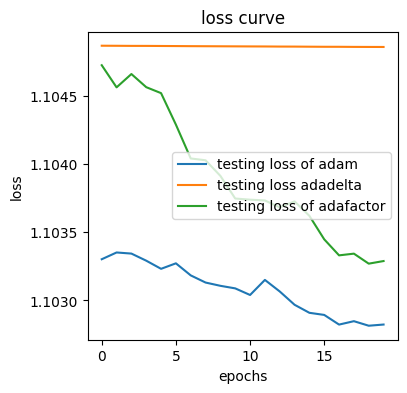

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(hitory.history['val_loss'],label = "testing loss of adam")
plt.plot(history1.history['val_loss'],label = "testing loss adadelta")
plt.plot(history2.history['val_loss'],label = "testing loss of adafactor")
plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Correct order of implementation
* Global varables(lr,epochs)
* model symmary plotting
* batch size
* use seperate optimizer object
* functional API

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Concatenate
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [31]:
iris = load_iris()
X = iris['data']
y = iris['target']

X_train,X_test,y_test,y_train = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
LEARNING_RATE = 0.01
BATCH_SIZE = 32
EPOCHS = 20


In [33]:
model = Sequential()
# this is a classification problem and output has 3 classes
model.add(Input(shape=(4,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(3,activation='softmax'))


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
a = plot_model(model,show_shapes=True,dpi = 100)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
adam_opt  = Adam(learning_rate = LEARNING_RATE,beta_1 = 0.9,beta_2 = 0.999,epsilon = 1e-8)

### Functional API

In [23]:
import tensorflow as tf

In [24]:
X_input = Input(shape=(4,))
Dense_1 = Dense(20,activation='relu')(X_input)
Dense_2 = Dense(30,activation='relu')(Dense_1)
X_out = Dense(3,activation='softmax')(Dense_2)
model1 = tf.keras.Model(inputs = X_input,outputs = X_out)


In [25]:

model1.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823 (3.21 KB)

 Trainable params: 823 (3.21 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_input = Input(shape=(4,))
Dense_1 = Dense(10,activation='relu')(X_input)
Dense_2 = Dense(10,activation='relu')(X_input)

merged = Concatenate()([Dense_1,Dense_2])

Dense_3 = Dense(30,activation='relu')(merged)
X_out = Dense(3,activation='softmax')(Dense_3)
model2 = tf.keras.Model(inputs = X_input,outputs = X_out)

In [27]:
model2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 10)        │         50 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 10)        │         50 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20)        │          0 │ dense_22[0][0],   │
│ (Concatenate)       │                   │            │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 30)        │        630 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 3)         │         93 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 823 (3.21 KB)

 Trainable params: 823 (3.21 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
adam_opt  = Adam(learning_rate = LEARNING_RATE,beta_1 = 0.9,beta_2 = 0.999,epsilon = 1e-8)

In [37]:
model2.compile(optimizer=adam_opt,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
               

In [45]:
iris = load_iris()
X = iris['data']
y = iris['target']
print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

(150,)
(150, 4)


In [46]:
hist1 = model2.fit(X_train,y_train,
                   epochs = EPOCHS,
                   validation_data = (X_test,y_test),
                   batch_size = BATCH_SIZE)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.2946 - loss: 1.8400 - val_accuracy: 0.3158 - val_loss: 1.3010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4107 - loss: 1.2109 - val_accuracy: 0.7105 - val_loss: 0.8987
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6518 - loss: 0.8916 - val_accuracy: 0.6842 - val_loss: 0.8616
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6607 - loss: 0.8346 - val_accuracy: 0.7368 - val_loss: 0.7100
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7143 - loss: 0.6968 - val_accuracy: 0.7105 - val_loss: 0.5988
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6518 - loss: 0.6030 - val_accuracy: 0.7105 - val_loss: 0.4960
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8304 - loss: 0.5499 - val_accuracy: 0.8158 - val_loss: 0.4675
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9286 - loss: 0.4832 - val_accuracy: 0.8684 - val_loss: 0.3934

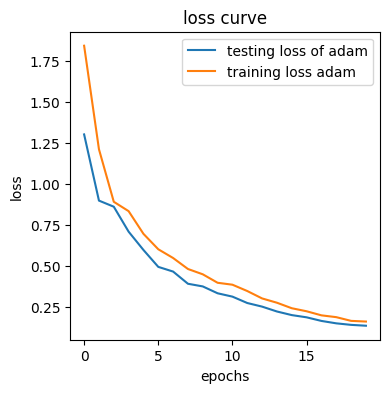

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(hist1.history['val_loss'],label = "testing loss of adam")
plt.plot(hist1.history['loss'],label = "training loss adam")
plt.title("loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Data loading